# PROYECTO SQL APP LIBROS


El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

__Descripción de los datos__

**`books`**

Contiene datos sobre libros:

- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

**`authors`**

Contiene datos sobre autores:

- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

**`publishers`**

Contiene datos sobre editoriales:

- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

**`ratings`**

Contiene datos sobre las calificaciones de usuarios:

- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

**`reviews`**

Contiene datos sobre las reseñas de los y las clientes:

- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña


__Ejercicio__

- Encuentra el número de libros publicados después del 1 de enero de 2000.
- Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

__Instrucciones para completar la tarea__

- Describe los objetivos del estudio.
- Estudia las tablas (imprime las primeras filas).
- Realiza una consulta SQL para cada una de las tareas.
- Genera los resultados de cada consulta en el Notebook.
- Describe tus conclusiones para cada una de las tareas.

__Diagrama de datos__

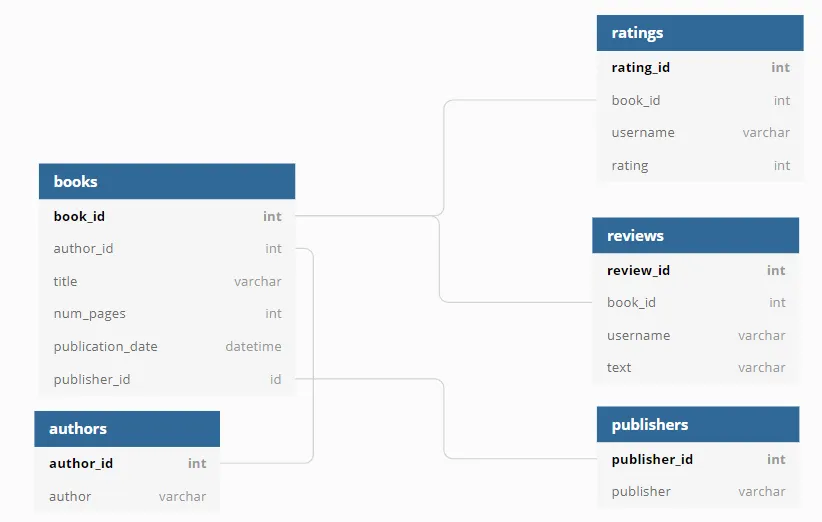

## Inicialización de los datos

### Conexión con la base de datos en SQL

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Exploración de los datos

__Funciones para manejo de datos__

Las siguientes funciones estan hechas para hacer más sencillo la extracción de los datos y para que la exploración de los datos se vea más limpia; cada funcnción tiene una descripción de lo que hace.

agrega cuantos datos tiene

In [39]:
# Función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna 
def analisis_tablas(tabla):
    
    # Extracción de las primeras 10 filas de las tablas
    sql_head = f""" 
    SELECT * 
    FROM {tabla} 
    LIMIT 10;
    """
    head = pd.read_sql(sql_head, con = engine)
    
    # Extracción de los tipos de las tablas
    sql_info = f"""
    SELECT column_name, data_type 
    FROM information_schema.columns 
    WHERE table_name = '{tabla}';
    """
    info = pd.read_sql(sql_info, con = engine)
    
    
    print(f"\nPrimeras 10 filas de '{tabla}':")
    display(head)
     
    print(f"\nInformación de los tipos de datos de '{tabla}':")
    display(info)

In [4]:
# Función que imprime los datos nulos y los duplicados
def null_dup(tabla):
    
    # Extracción de las tablas y sus columnas
    sql_columns = f"""
    SELECT column_name 
    FROM information_schema.columns
    WHERE table_name = '{tabla}';
    """
    select_columns = pd.read_sql(sql_columns, con = engine)
    columns = select_columns['column_name'].tolist()
    
    # Cuenta de los datos nulos (restando todos los datos con las columnas que tengan algún dato nulo para sacar el total)
    select_null = ",".join([f" COUNT(*) - COUNT({col}) AS null_{col}" for col in columns])
    sql_null = f"""
    SELECT {select_null}
    FROM {tabla};
    """
    nulls = pd.read_sql(sql_null, con = engine)
    
    # Cuenta de datos duplicados en total de las filas
    sql_dup = f"""
    SELECT COUNT(*) - COUNT(DISTINCT {columns[0]}) 
    AS Duplicados
    FROM {tabla};
    """
    dups = pd.read_sql(sql_dup, con = engine)
    
    
    print(f"\nValores nulos en '{tabla}':")
    display(nulls)
    
    print(f"\nValores duplicados en '{tabla}':")
    display(dups)

### Tabla `books`

In [40]:
# Llamada a la función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna 
analisis_tablas('books')


Primeras 10 filas de 'books':


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116



Información de los tipos de datos de 'books':


,column_name,data_type
0,book_id,integer
1,author_id,integer
2,num_pages,integer
3,publication_date,date
4,publisher_id,integer
5,title,text


La tabla `books` muesta los datos de libros, número de páginas, fecha de publicación e identificación del autor. Puedo observar que todos los datos concuerdan con sus tipos.

In [7]:
# Lamada a la función que imprime los datos nulos y los duplicados
null_dup('books')


Valores nulos en 'books':


,null_book_id,null_author_id,null_num_pages,null_publication_date,null_publisher_id,null_title
0,0,0,0,0,0,0



Valores duplicados en 'books':


,duplicados
0,0


No exiten datos nulos ni duplicados.

### Tabla `authors`

In [8]:
# Llamada a la función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna 
analisis_tablas('authors')


Primeras 10 filas de 'authors':


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts



Información de los tipos de datos de 'authors':


,column_name,data_type
0,author_id,integer
1,author,text


La tabla `authors` nos muestra 2 columnas que contiene el id de los autores y el nombre del autor; los typos coinciden con los datos.

In [9]:
# Lamada a la función que imprime los datos nulos y los duplicados
null_dup('authors')


Valores nulos en 'authors':


,null_author_id,null_author
0,0,0



Valores duplicados en 'authors':


,duplicados
0,0


No existen datos nulos o duplicados.

### Tabla `publishers`

In [10]:
# Llamada a la función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna
analisis_tablas('publishers')


Primeras 10 filas de 'publishers':


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers



Información de los tipos de datos de 'publishers':


,column_name,data_type
0,publisher_id,integer
1,publisher,text


La tabla `publishers` contiene 2 columnas que son el id de la editora y el nombre del mismo, los tipos de textos estan correctos.

In [11]:
# Lamada a la función que imprime los datos nulos y los duplicados
null_dup('publishers')


Valores nulos en 'publishers':


,null_publisher_id,null_publisher
0,0,0



Valores duplicados en 'publishers':


,duplicados
0,0


No existen valores nulos ni duplicados.

### Tabla `ratings`

In [12]:
# Llamada a la función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna 
analisis_tablas('ratings')


Primeras 10 filas de 'ratings':


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4



Información de los tipos de datos de 'ratings':


,column_name,data_type
0,rating_id,integer
1,book_id,integer
2,rating,integer
3,username,text


La tabla `raiting` muestra 4 columnas tenemos el nombre del usuario que hicieron identificación de un libro y el raiting. Los tipos de cada columna son correctos.

In [13]:
# Lamada a la función que imprime los datos nulos y los duplicados
null_dup('ratings')


Valores nulos en 'ratings':


,null_rating_id,null_book_id,null_rating,null_username
0,0,0,0,0



Valores duplicados en 'ratings':


,duplicados
0,0


No hay valores nulos ni duplicados.

### Tabla `reviews`

In [14]:
# Llamada a la función que extrae las tablas mostrando las 10 pimeras filas y el tipo de cada columna 
analisis_tablas('reviews')


Primeras 10 filas de 'reviews':


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...



Información de los tipos de datos de 'reviews':


,column_name,data_type
0,review_id,integer
1,book_id,integer
2,username,text
3,text,text


La tabla `reviews` contiene los nombres de los usuarios  y sus reseñas así como el id del libro y el id del review.  Los tipos son correctos.

In [15]:
# Lamada a la función que imprime los datos nulos y los duplicados
null_dup('reviews')


Valores nulos en 'reviews':


,null_review_id,null_book_id,null_username,null_text
0,0,0,0,0



Valores duplicados en 'reviews':


,duplicados
0,0


No existen valores nulos ni duplicados.

## Análisis exploratorio

### Encuentra el número de libros publicados después del 1 de enero de 2000

En total se han publicado 998 libros y de esos a partir del primero de enero del año 2000 hasta después del 2020 que comenzó la pandemia se han publicado 819 libros , antes de esta fecha fueron 179. Se puede observar que aunque es un número considerable de libros pienso que son muy pocos para ser un transcurso de casi 20 años.

In [16]:
sql = """
SELECT COUNT(book_id) AS num_books
FROM books
WHERE publication_date > '2000-01-01';
"""
books = pd.read_sql(sql, con = engine)
display(books)

,num_books
0,819


In [17]:
sql = """
SELECT COUNT(book_id) AS num_books
FROM books
WHERE publication_date < '2000-01-01';
"""
books = pd.read_sql(sql, con = engine)
display(books)

,num_books
0,179


### Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro

Esta tabla nos muestra el titulo de los libros con mayor reseñas y su raiting promedio; el primer lugar lo ocupa el primer libro de 'Twilight' con 1 120 reviews y un rating promedio de 3.66, seguido del libro 'The Hobbit or There and Back Again' con un número de reviews de 528 muy por debajo del primer lugar, sin embargo tiene un rating promedio mayor con 4.12 y en tercer lugar esta 'The Catcher in the Rye' con 516 reviews y un rating promedio de 3.82. 

Se puede observar que el top 10 con mayor reviews son novelas de fantasía, romance, misterio y ciencia ficción con buenas calificasiones de estre 3.5 a 4.8; esto es importante ya que a mayor interacción de los usuarios con los libros mayor relavencia de la app.

In [18]:
sql = """
SELECT books.title,
COUNT(reviews.review_id) AS num_review,
AVG(ratings.rating) AS avg_rating
FROM books
LEFT JOIN reviews ON books.book_id = reviews.book_id
LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY books.title
ORDER BY num_review DESC
LIMIT 10;
"""
reviews_ratings = pd.read_sql(sql, con = engine)
display(reviews_ratings)

,title,num_review,avg_rating
0,Twilight (Twilight #1),1120,3.662500
1,The Hobbit or There and Back Again,528,4.125000
2,The Catcher in the Rye,516,3.825581
3,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.414634
4,Harry Potter and the Chamber of Secrets (Harry...,480,4.287500
5,Angels & Demons (Robert Langdon #1),420,3.678571
6,Harry Potter and the Order of the Phoenix (Har...,375,4.186667
7,The Lightning Thief (Percy Jackson and the Oly...,372,4.080645
8,The Fellowship of the Ring (The Lord of the Ri...,370,4.391892
9,Animal Farm,370,3.729730


### Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis)

La editorial con mayor número de libros publicados en Penguin Books con 42 libros, seguido de Vintage con 31 libros en tercer lugar esta Grand Central Publishing con 25 libros; es importante asociarse con editoriales influyentes que mantengan en constancia la publicación de libros.

In [19]:
sql = """
SELECT publishers.publisher, 
COUNT(books.book_id) AS num_books
FROM books
INNER JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE books.num_pages > 50
GROUP BY publishers.publisher
ORDER BY num_books DESC
LIMIT 10;
"""
publisher = pd.read_sql(sql, con = engine)
display(publisher)

,publisher,num_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,St. Martin's Press,14
8,Berkley Books,14
9,William Morrow Paperbacks,13


### Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones

La tabla nos muestra los autores con mayor rating promedio estando a la cabeza la autora Diana Gabaldon con un rating promedio de 4.30, esta autora se caracteriza por sus novelas de romance históricas. En segundo lugar esta la autora J.K. Rowling/Mary GrandPré conocida por la saga de Harry Potter una saga de fantasía y ciencia ficción que como vimos se encuentra en el top 10 de libros, esta autora tiene un rating promedio de 4.28. Todos los autores que encabezan la tabla no tienen gran diferencia entre los reviews promedio.

In [20]:
sql = """
SELECT authors.author,
ROUND(AVG(ratings.rating), 2) AS avg_rating
FROM books
JOIN authors ON books.author_id = authors.author_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY authors.author
HAVING COUNT(ratings.rating) >= 50
ORDER BY avg_rating DESC
LIMIT 10;
"""

top_authors = pd.read_sql(sql, con = engine)
display(top_authors)

,author,avg_rating
0,Diana Gabaldon,4.30
1,J.K. Rowling/Mary GrandPré,4.29
2,Agatha Christie,4.28
3,Markus Zusak/Cao Xuân Việt Khương,4.26
4,J.R.R. Tolkien,4.24
5,Roald Dahl/Quentin Blake,4.21
6,Louisa May Alcott,4.20
7,Rick Riordan,4.13
8,Arthur Golden,4.11
9,Stephen King,4.01


### Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros

Aunque los usuarios son en su mayoria activos con las reviews más aún cuando el fandom del libro o autor es popular se observa que no hay usuarios que hagan 50 reviews, así que para ver el promedio decidí reducir el número de reviews a la mitad se nos muestra que un usuario puede hacer un promedio de 26.85 reviews.

In [35]:
sql = """
SELECT AVG(review_count) AS avg_reviews_per_user
FROM (
    SELECT ratings.username,
    COUNT(reviews.review_id) AS review_count
    FROM ratings
    JOIN reviews ON ratings.book_id = reviews.book_id AND ratings.username = reviews.username
    GROUP BY ratings.username
    HAVING COUNT(ratings.rating) > 50
) AS subquery;
"""

avg_review = pd.read_sql(sql, con = engine)
display(avg_review)

,avg_reviews_per_user
0,None


In [32]:
sql = """
SELECT AVG (review_count) AS avg_reviews_per_user
FROM (
    SELECT ratings.username, 
    COUNT(reviews.review_id) AS review_count
    FROM ratings
    JOIN reviews ON ratings.book_id = reviews.book_id AND ratings.username = reviews.username
    GROUP BY ratings.username
    HAVING COUNT(ratings.rating) > 25
) AS subquery;
"""
avg_review = pd.read_sql(sql, con = engine)
display(avg_review)

,avg_reviews_per_user
0,26.857143


## Conclusión

El análisis de los datos nos arrojo estos resultados según los objetivos:

► Se recomienda al cliente que aumente el número de libros a agregar en la app para que los usuarios tengan mayor variedad para escoger.

► Se pudo observar que las novelas de fantasía, ciencia ficción, romance y misterio tienen mayor interacción con reviews y ratings, así que se les recomienda prestar mayor atención a estos géneros al agregar libros y novelas.

► También es importante recalcar que los autores con mayor rating tienen sagas completas muy populares, se recomienda agregar a estos autores e indagar sobre las diferentes sagas que tengan potencial; en géneral agregar sagas completas es una buena opción.

► Aunque no es tan relevante puedo obserbar que en la mayoria de los tops son encabezadas por autoras y novelas de fantasía y romance lo cúal me hace pensar que los usuarios podrían ser en su mayoría mujeres y esto podría ayudar a llevar un enfoque a este público para que la app sea más conocida.

► Por último podría decir que para que haya mayor reviews por parte de los usuarios se podría dar un incentivo a cambio de un review y así aumentarlos.